In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier , export_text , plot_tree

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
train , test = train_test_split(data ,test_size = 0.2,random_state=42 )

In [35]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166,0.346906
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
train[train == 0].count()

Pregnancies                  91
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                     401
dtype: int64

In [5]:
train.drop(['Insulin','SkinThickness'],1,inplace=True)

C:\Users\popan\AppData\Local\Temp/ipykernel_2284/3155610790.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop(['Insulin','SkinThickness'],1,inplace=True)
C:\Users\popan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
test.drop(['Insulin','SkinThickness'],1,inplace=True)

C:\Users\popan\AppData\Local\Temp/ipykernel_2284/3486806107.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(['Insulin','SkinThickness'],1,inplace=True)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

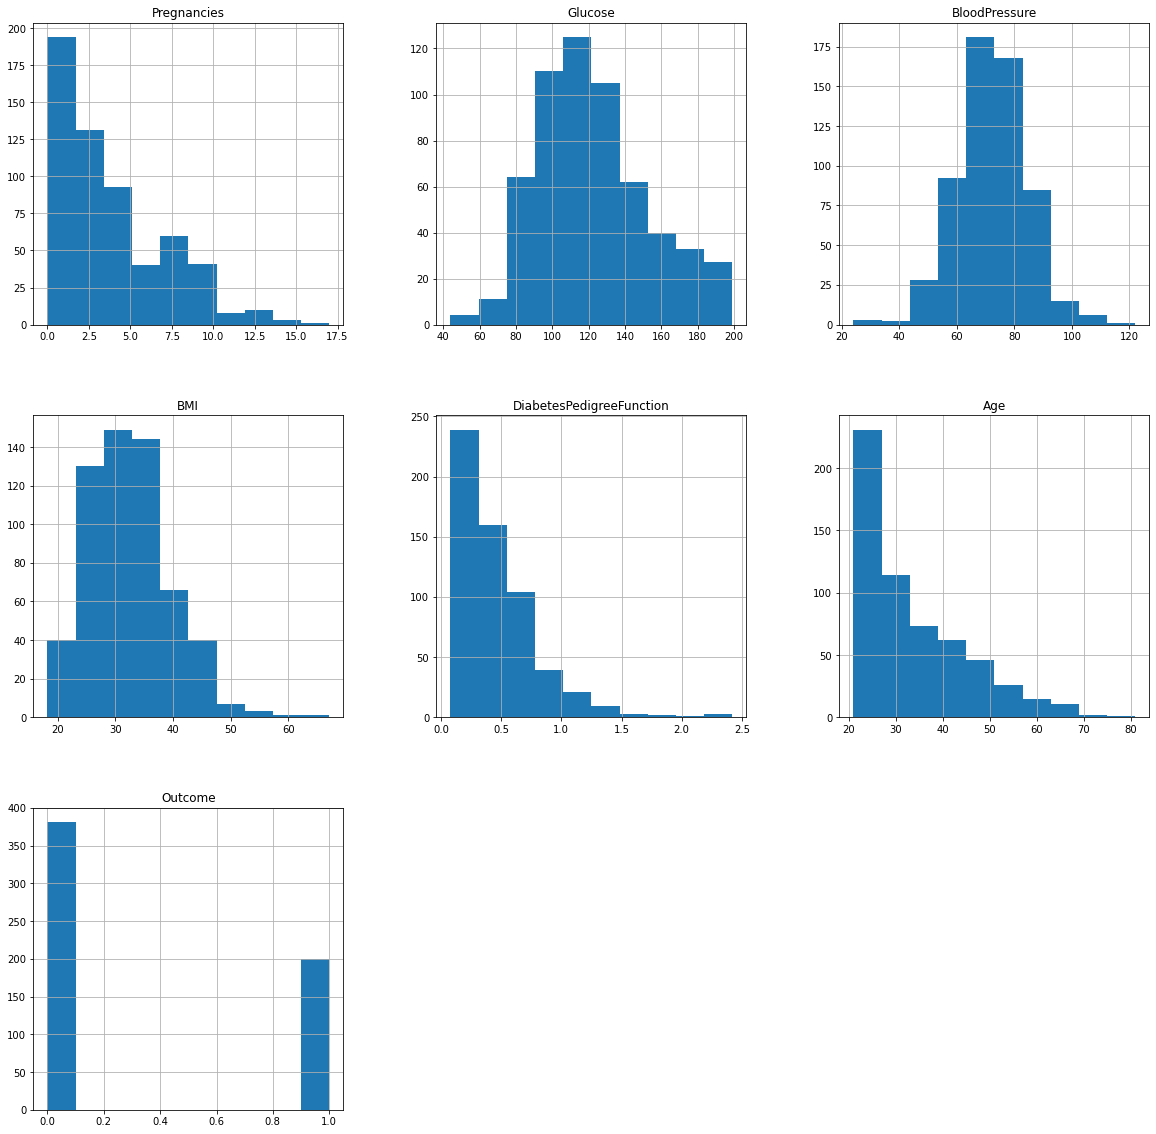

In [17]:
train[(train['Glucose']!=0)&(train['BMI']!=0)&(train['BloodPressure']!=0)].hist(figsize = (20,20))

In [7]:
train['Glucose'].replace(0 ,train['Glucose'].median(),inplace=True )
train['BMI'].replace(0 ,train['BMI'].median(),inplace=True )
train['BloodPressure'].replace(0 ,train['BloodPressure'].mean(),inplace=True )

C:\Users\popan\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [8]:
test['Glucose'].replace(0 ,train['Glucose'].median(),inplace=True )
test['BMI'].replace(0 ,train['BMI'].median(),inplace=True )
test['BloodPressure'].replace(0 ,train['BloodPressure'].mean(),inplace=True )

<AxesSubplot:>

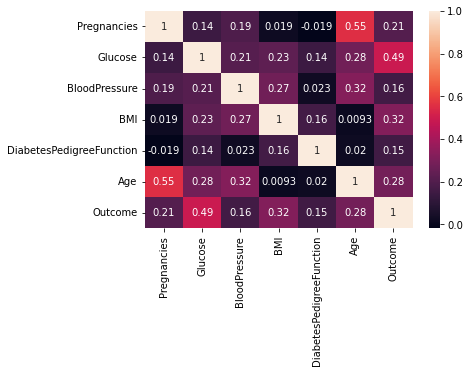

In [23]:
sns.heatmap(train.corr(),annot=True)

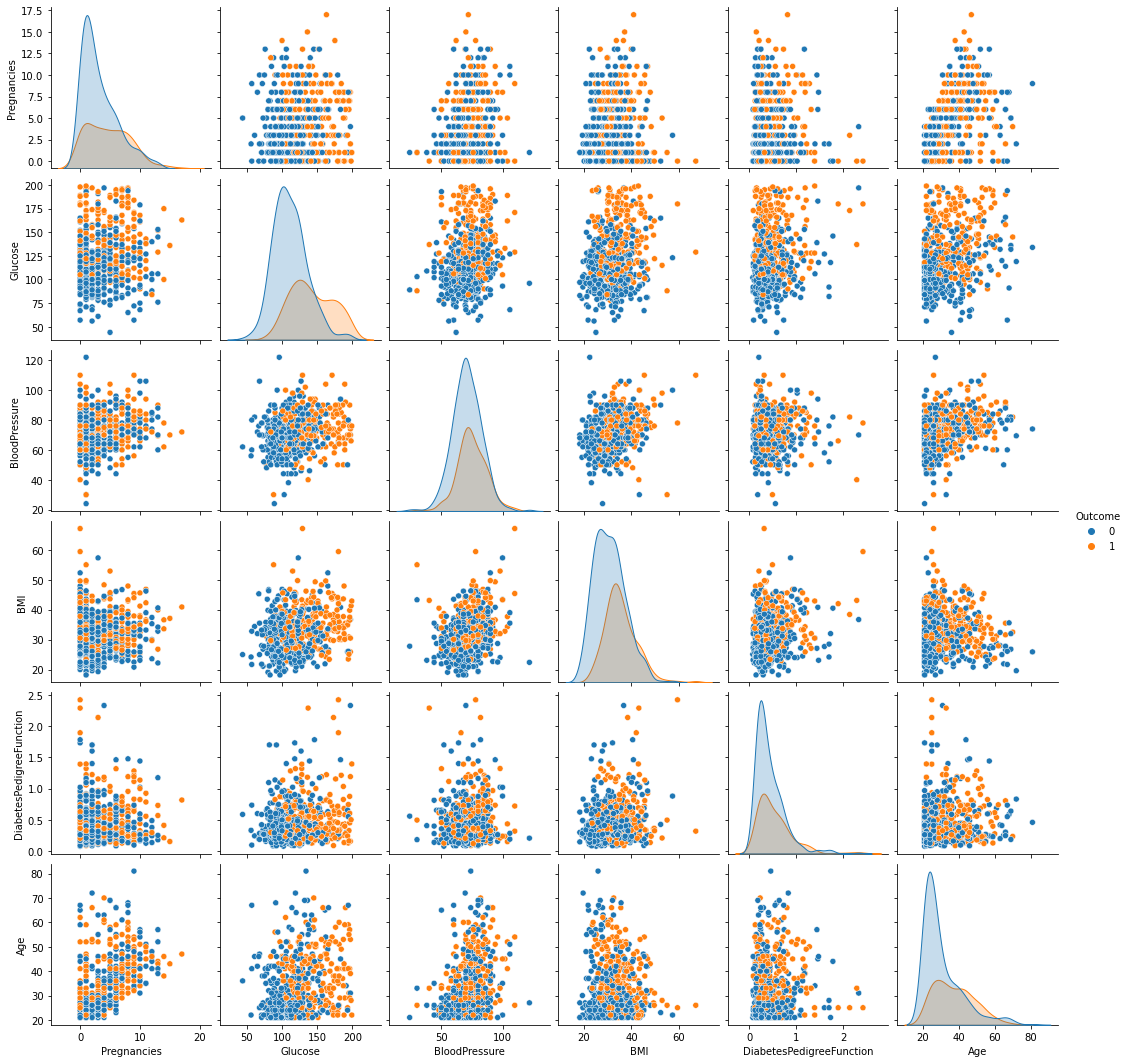

In [24]:
sns.pairplot(train ,hue='Outcome' )

<AxesSubplot:>

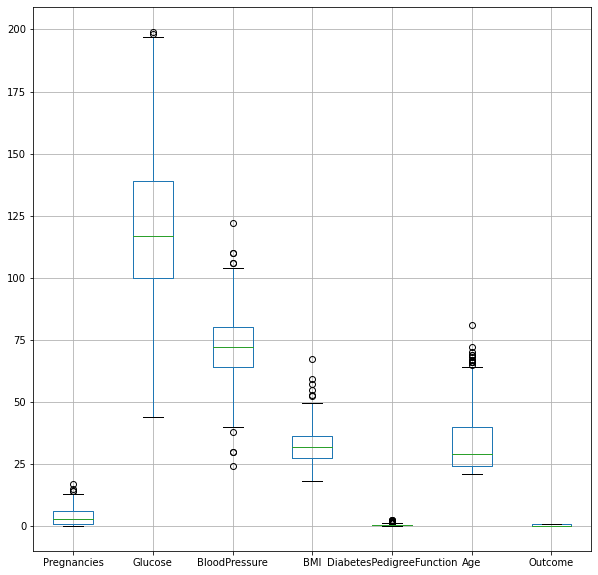

In [31]:
train.boxplot(figsize=(10,10))

C:\Users\popan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

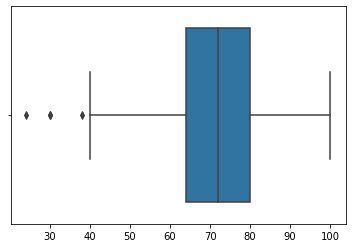

In [42]:
sns.boxplot(np.where(train['BloodPressure']>100,100,train['BloodPressure']))

C:\Users\popan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

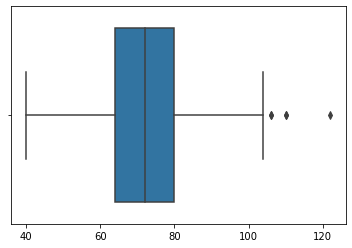

In [43]:
sns.boxplot(np.where(train['BloodPressure']<40,40,train['BloodPressure']))

In [10]:
x_train = train.drop('Outcome',1)
y_train = train['Outcome']

x_test = test.drop('Outcome',1)
y_test = test['Outcome']

C:\Users\popan\AppData\Local\Temp/ipykernel_2284/2786977699.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = train.drop('Outcome',1)
C:\Users\popan\AppData\Local\Temp/ipykernel_2284/2786977699.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_test = test.drop('Outcome',1)


In [11]:
knn = KNeighborsClassifier(2)
knn.fit(x_train,y_train)
y_train_knn=knn.predict(x_train)
print(accuracy_score(y_train,y_train_knn))

0.8517915309446255


In [12]:
print(classification_report(y_train,y_train_knn))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       401
           1       1.00      0.57      0.73       213

    accuracy                           0.85       614
   macro avg       0.91      0.79      0.81       614
weighted avg       0.88      0.85      0.84       614



In [13]:
cm = confusion_matrix(y_train,y_train_knn)

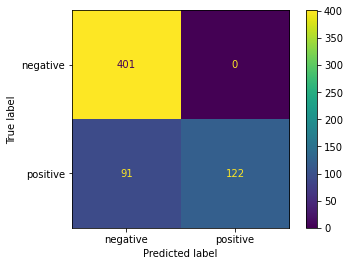

In [14]:
ConfusionMatrixDisplay(cm,display_labels=['negative' , 'positive']).plot()

In [15]:
knn_params = {'n_neighbors': list(range(1,100))}
model = GridSearchCV(KNeighborsClassifier(),knn_params,cv=5,verbose=2)
model.fit(x_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

[CV] END .....................................n_neighbors=22; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END ...................

[CV] END .....................................n_neighbors=45; total time=   0.0s
[CV] END .....................................n_neighbors=45; total time=   0.0s
[CV] END .....................................n_neighbors=46; total time=   0.0s
[CV] END .....................................n_neighbors=46; total time=   0.0s
[CV] END .....................................n_neighbors=46; total time=   0.0s
[CV] END .....................................n_neighbors=46; total time=   0.0s
[CV] END .....................................n_neighbors=46; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END .....................................n_neighbors=47; total time=   0.0s
[CV] END ...................

[CV] END .....................................n_neighbors=70; total time=   0.0s
[CV] END .....................................n_neighbors=70; total time=   0.0s
[CV] END .....................................n_neighbors=70; total time=   0.0s
[CV] END .....................................n_neighbors=70; total time=   0.0s
[CV] END .....................................n_neighbors=70; total time=   0.0s
[CV] END .....................................n_neighbors=71; total time=   0.0s
[CV] END .....................................n_neighbors=71; total time=   0.0s
[CV] END .....................................n_neighbors=71; total time=   0.0s
[CV] END .....................................n_neighbors=71; total time=   0.0s
[CV] END .....................................n_neighbors=71; total time=   0.0s
[CV] END .....................................n_neighbors=72; total time=   0.0s
[CV] END .....................................n_neighbors=72; total time=   0.0s
[CV] END ...................

[CV] END .....................................n_neighbors=93; total time=   0.0s
[CV] END .....................................n_neighbors=93; total time=   0.0s
[CV] END .....................................n_neighbors=93; total time=   0.0s
[CV] END .....................................n_neighbors=93; total time=   0.0s
[CV] END .....................................n_neighbors=94; total time=   0.0s
[CV] END .....................................n_neighbors=94; total time=   0.0s
[CV] END .....................................n_neighbors=94; total time=   0.0s
[CV] END .....................................n_neighbors=94; total time=   0.0s
[CV] END .....................................n_neighbors=94; total time=   0.0s
[CV] END .....................................n_neighbors=95; total time=   0.0s
[CV] END .....................................n_neighbors=95; total time=   0.0s
[CV] END .....................................n_neighbors=95; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [62]:
model.best_params_

{'n_neighbors': 31}

In [65]:
knn2 = model.best_estimator_

In [64]:
model.best_score_

0.7622284419565508

In [67]:
y_train_knn2=knn2.predict(x_train)
print(accuracy_score(y_train,y_train_knn2))

0.7654723127035831


In [68]:
print(classification_report(y_train,y_train_knn2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       401
           1       0.70      0.57      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [71]:
svc = SVC()
svc.fit(x_train,y_train)
y_train_svc=svc.predict(x_train)
print(classification_report(y_train,y_train_svc))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       401
           1       0.75      0.49      0.59       213

    accuracy                           0.77       614
   macro avg       0.76      0.70      0.71       614
weighted avg       0.76      0.77      0.75       614



In [85]:
svc_params = {'kernel': ('linear','poly','rbf') , 'C' :[1,10] , 'degree' : [2,5]}
model = GridSearchCV(SVC(),svc_params,cv=5,verbose=3)
model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=1, degree=2, kernel=linear;, score=0.748 total time=   0.1s
[CV 2/5] END ......C=1, degree=2, kernel=linear;, score=0.805 total time=   0.1s
[CV 3/5] END ......C=1, degree=2, kernel=linear;, score=0.764 total time=   0.1s
[CV 4/5] END ......C=1, degree=2, kernel=linear;, score=0.748 total time=   0.1s
[CV 5/5] END ......C=1, degree=2, kernel=linear;, score=0.787 total time=   0.1s
[CV 1/5] END ........C=1, degree=2, kernel=poly;, score=0.732 total time=   0.0s
[CV 2/5] END ........C=1, degree=2, kernel=poly;, score=0.789 total time=   0.0s
[CV 3/5] END ........C=1, degree=2, kernel=poly;, score=0.756 total time=   0.0s
[CV 4/5] END ........C=1, degree=2, kernel=poly;, score=0.756 total time=   0.0s
[CV 5/5] END ........C=1, degree=2, kernel=poly;, score=0.770 total time=   0.0s
[CV 1/5] END .........C=1, degree=2, kernel=rbf;, score=0.748 total time=   0.0s
[CV 2/5] END .........C=1, degree=2, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'degree': [2, 5],
                         'kernel': ('linear', 'poly', 'rbf')},
             verbose=3)

In [79]:
model.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [92]:
svc = model.best_estimator_

In [93]:
y_train_svc= svc.predict(x_train)
print(classification_report(y_train,y_train_svc))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.70      0.55      0.62       213

    accuracy                           0.76       614
   macro avg       0.74      0.71      0.72       614
weighted avg       0.76      0.76      0.75       614



In [97]:
pip_knn = Pipeline(steps=[('scalar',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=13))])

In [98]:
pip_knn.fit(x_train,y_train)
y_pred_piptrain = pip_knn.predict(x_train)
print(classification_report(y_train,y_pred_piptrain))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       401
           1       0.75      0.62      0.68       213

    accuracy                           0.80       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.80      0.79       614



In [99]:
pip_svc = Pipeline(steps=[('scalar',StandardScaler()),('svc',SVC(kernel='linear',C=1))])

In [100]:
pip_svc.fit(x_train,y_train)
y_pred_piptrain = pip_svc.predict(x_train)
print(classification_report(y_train,y_pred_piptrain))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.70      0.55      0.62       213

    accuracy                           0.76       614
   macro avg       0.74      0.71      0.72       614
weighted avg       0.76      0.76      0.75       614



In [101]:
y_pred_piptest = pip_knn.predict(x_test)
print(classification_report(y_test,y_pred_piptest))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



In [102]:
y_pred_piptest = pip_svc.predict(x_test)
print(classification_report(y_test,y_pred_piptest))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



the conclousion is svc is better than knn 

In [16]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

0.8224755700325733

In [17]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.7792207792207793

In [18]:
clf = DecisionTreeClassifier()
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

1.0

In [19]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.7662337662337663

overfit with default parameters

In [20]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(x_train ,y_train)
y_pred_train = clf.predict(x_train)
accuracy_score(y_train , y_pred_train)

0.9087947882736156

In [21]:
y_pred_test = clf.predict(x_test)
accuracy_score(y_test , y_pred_test)

0.7532467532467533

In [23]:
dt_params = { 'max_depth' :[1,3,5,7] , 'min_samples_leaf' : [1,2,3,4,5]}
model = GridSearchCV(DecisionTreeClassifier(),dt_params,cv=5,verbose=3)
model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...max_depth=1, min_samples_leaf=1;, score=0.699 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=1;, score=0.756 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=1;, score=0.715 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=1;, score=0.732 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=1;, score=0.738 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=2;, score=0.699 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=2;, score=0.756 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=2;, score=0.715 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=2;, score=0.732 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=2;, score=0.738 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=3;, score=0.699 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=3

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             verbose=3)

In [24]:
clf = model.best_estimator_

In [26]:
y_train_clf= clf.predict(x_train)
print(accuracy_score(y_train,y_train_clf))

0.7752442996742671


In [27]:
y_test_clf= clf.predict(x_test)
print(accuracy_score(y_test,y_test_clf))

0.7597402597402597
